In [1]:
import numpy as np

def parse_dbn(dbn_file):
    with open(dbn_file, 'r') as f:
        lines = f.readlines()
        # TODO: rewrite this method to handle multiple sequences and structures
        # Check if the file is in the correct format
        if len(lines) < 3:
            raise ValueError('The DBN file does not contain enough lines to return sequence and structure')
        sequence = lines[1].strip()  # Second line is the sequence
        structure = lines[2].strip()  # Third line is the dot-bracket notation
    return sequence, structure

def construct_secondary_structure_matrix(sequence, structure):
    """
    Constructs a secondary structure matrix for an RNA sequence based on its dot-bracket notation.

    The secondary structure matrix is an N x N matrix (where N is the length of the sequence) that 
    represents base pairings in the secondary structure. A '1' in position (i, j) of the matrix 
    indicates that the nucleotide at position i is paired with the nucleotide at position j, 
    and the matrix is symmetric since RNA base pairings are bidirectional.

    Parameters:
    ----------
    sequence : str
        The RNA sequence (not used directly in the computation but required for matrix size).
    structure : str
        Dot-bracket notation representing the RNA secondary structure. '(' represents a nucleotide
        that is base-paired with a later nucleotide, and ')' represents a nucleotide that is paired
        with a preceding nucleotide. Dots '.' represent unpaired nucleotides.

    Returns:
    -------
    matrix : np.ndarray
        An N x N matrix where N is the length of the sequence, with 1s indicating base pairings 
        and 0s elsewhere.

    Example:
    -------
    sequence = "GCAU"
    structure = "(..)"
    matrix = construct_secondary_structure_matrix(sequence, structure)
    # matrix will be:
    # array([[0, 0, 1, 0],
    #        [0, 0, 0, 0],
    #        [1, 0, 0, 0],
    #        [0, 0, 0, 0]])
    """
    N = len(sequence)
    matrix = np.zeros((N, N), dtype=int)
    
    # Stack to hold positions of '('
    stack = []
    
    for i, char in enumerate(structure):
        if char == '(':
            stack.append(i)
        elif char == ')':
            if stack:
                j = stack.pop()
                matrix[i][j] = 1
                matrix[j][i] = 1  # Symmetric pairing
    return matrix

dbn_file = 'example.dbn'  # Replace with actual DBN file path
sequence, structure = parse_dbn(dbn_file)
matrix = construct_secondary_structure_matrix(sequence, structure)

print(matrix)

[[0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]


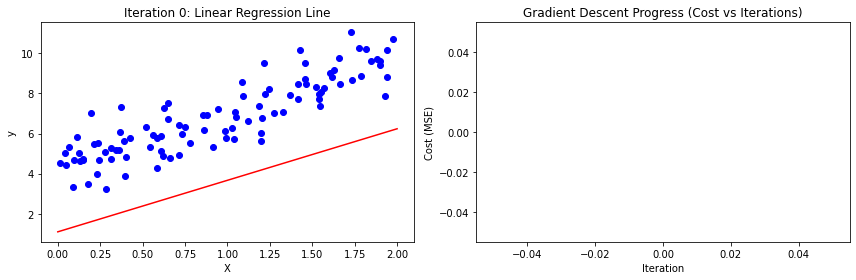

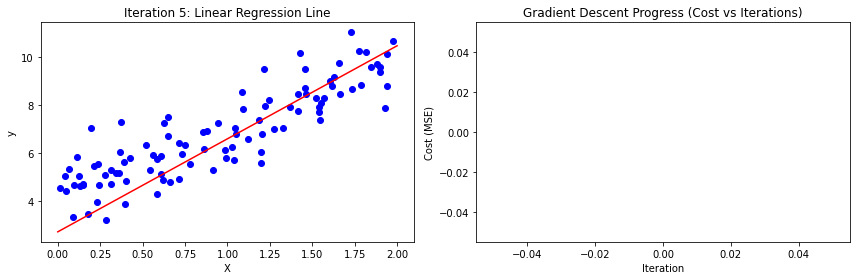

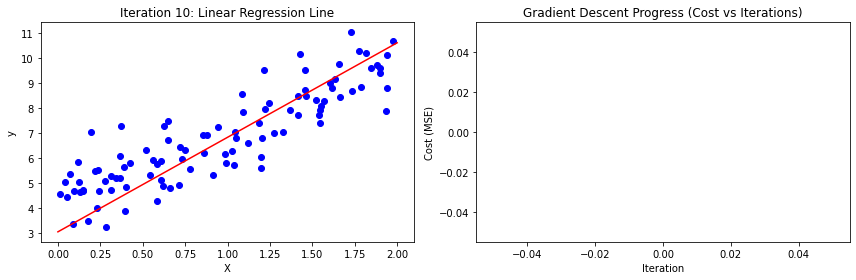

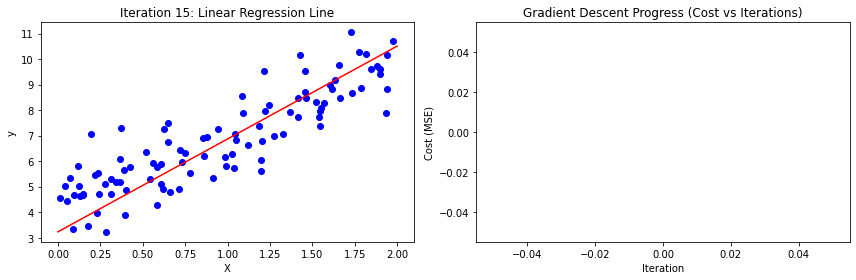

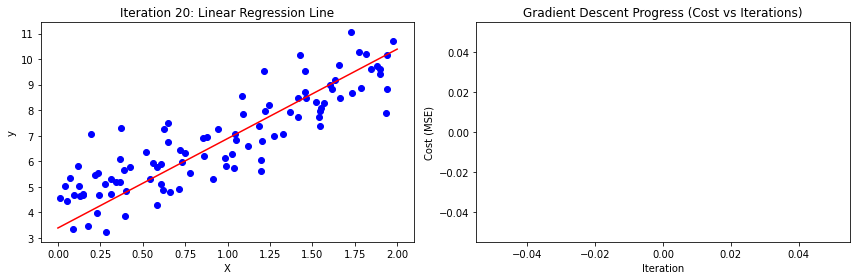

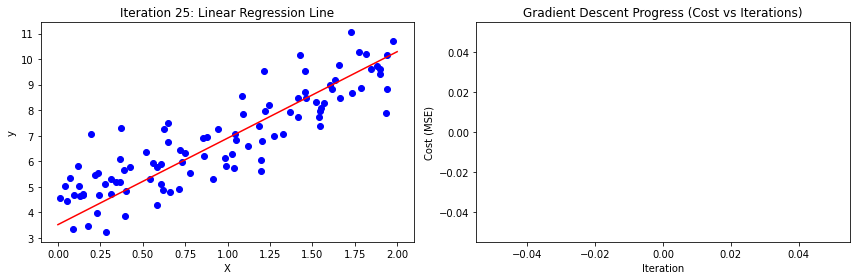

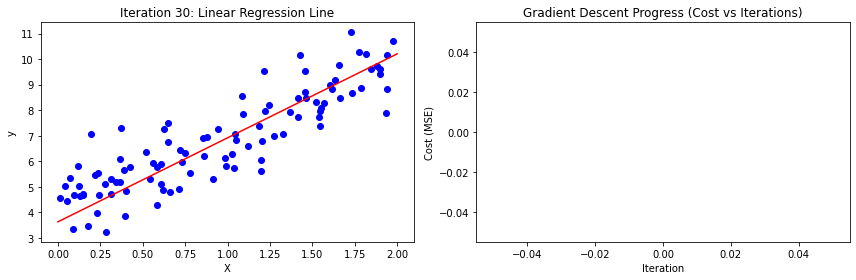

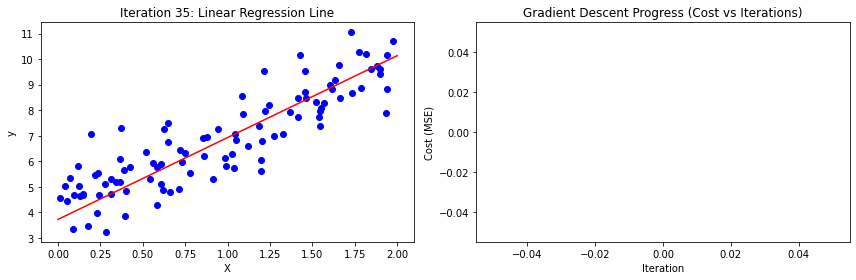

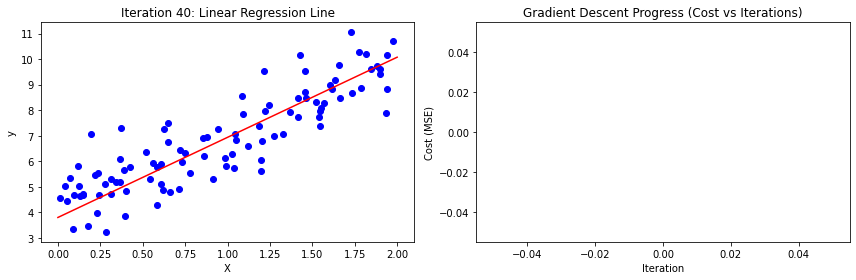

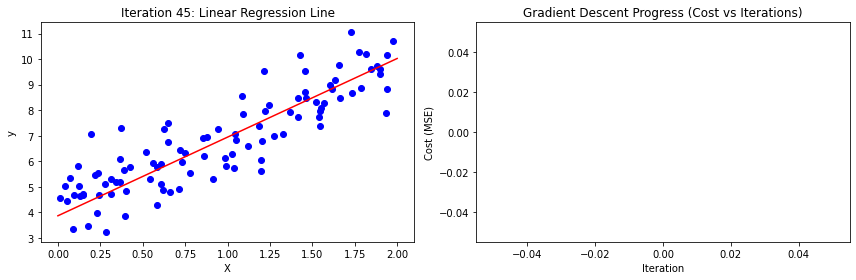

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias column to X (for the intercept term)
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters for gradient descent
theta = np.random.randn(2, 1)  # Start with random values for theta
learning_rate = 0.1
n_iterations = 50
m = len(X_b)
cost_history = []

# Function to compute cost (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum(np.square(predictions - y))

# Function for gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = []
    theta_history = []

    for iteration in range(n_iterations):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        
        if iteration % 5 == 0:  # Plot every 5 iterations
            plot_regression_line(X[:, 1], y, theta, iteration)
    
    return theta, cost_history, theta_history

# Function to plot the regression line
def plot_regression_line(X, y, theta, iteration):
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Data points and regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue')
    line_x = np.linspace(0, 2, 100)
    line_y = theta[0] + theta[1] * line_x
    plt.plot(line_x, line_y, color='red')
    plt.title(f'Iteration {iteration}: Linear Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    
    # Plot 2: Cost history (MSE) over iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(cost_history)), cost_history, color='green')
    plt.title('Gradient Descent Progress (Cost vs Iterations)')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    
    plt.tight_layout()
    plt.show()

# Perform gradient descent and plot the process
theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)